Non-numeric columns: Index(['hash', 'classification'], dtype='object')
First few rows of the dataset:
    millisecond classification  state  usage_counter        prio  static_prio  \
0            0        malware      0              0  3069378560        14274   
1            1        malware      0              0  3069378560        14274   
2            2        malware      0              0  3069378560        14274   
3            3        malware      0              0  3069378560        14274   
4            4        malware      0              0  3069378560        14274   

   normal_prio  policy  vm_pgoff  vm_truncate_count  ...  nivcsw  min_flt  \
0            0       0         0              13173  ...       0        0   
1            0       0         0              13173  ...       0        0   
2            0       0         0              13173  ...       0        0   
3            0       0         0              13173  ...       0        0   
4            0       0         

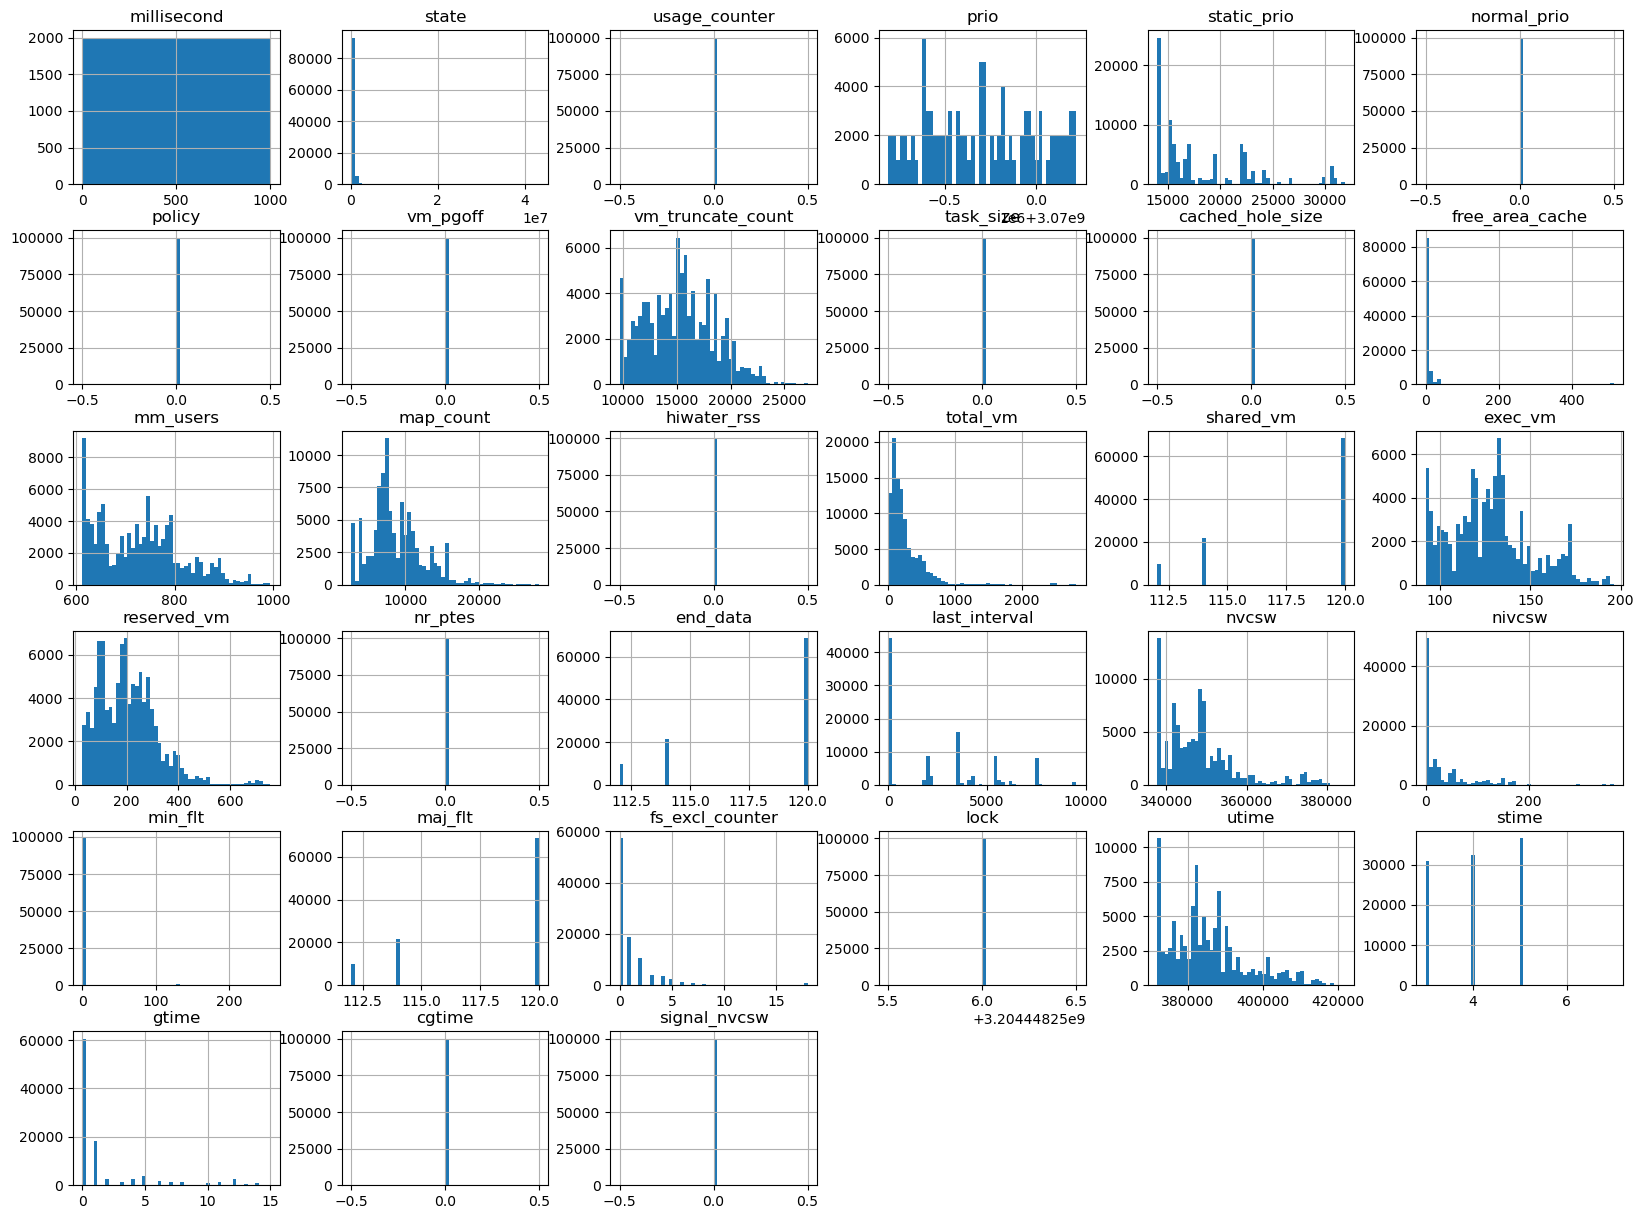

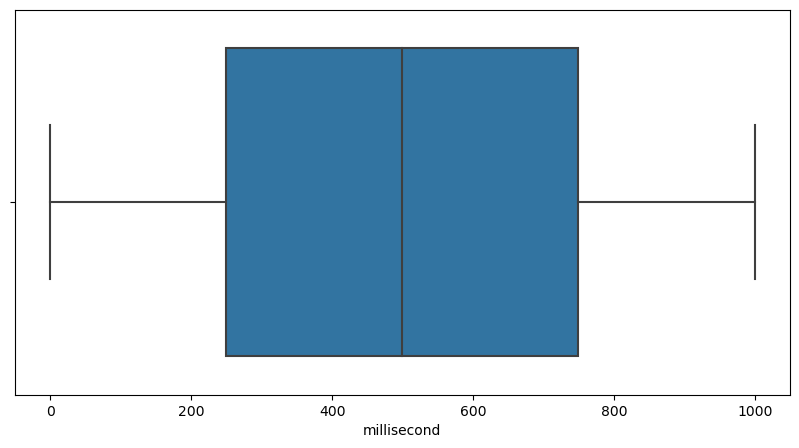

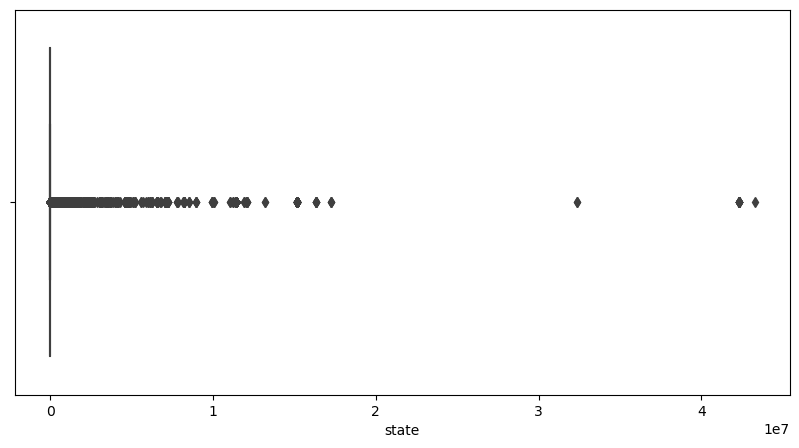

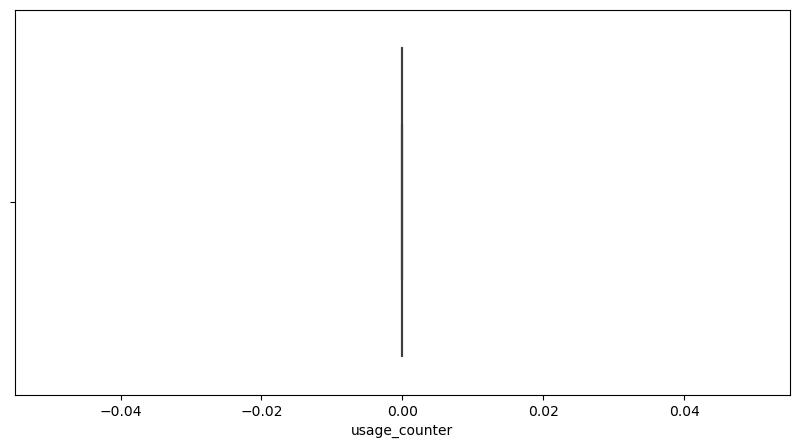

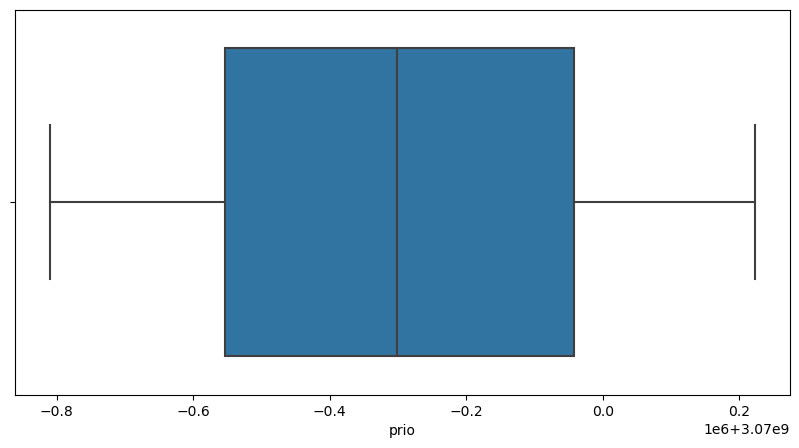

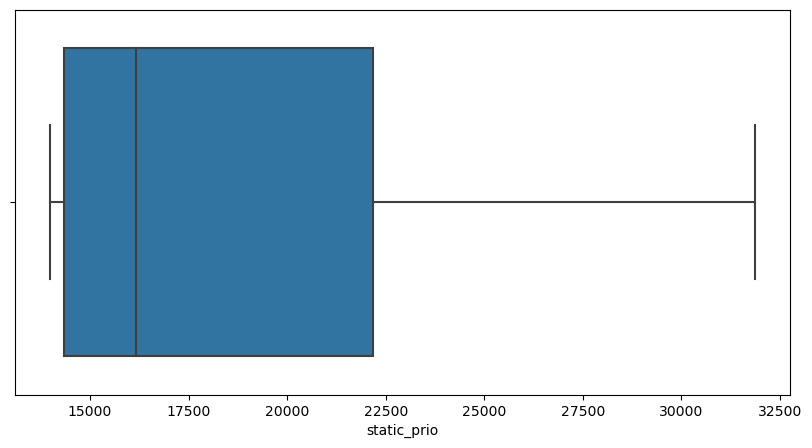

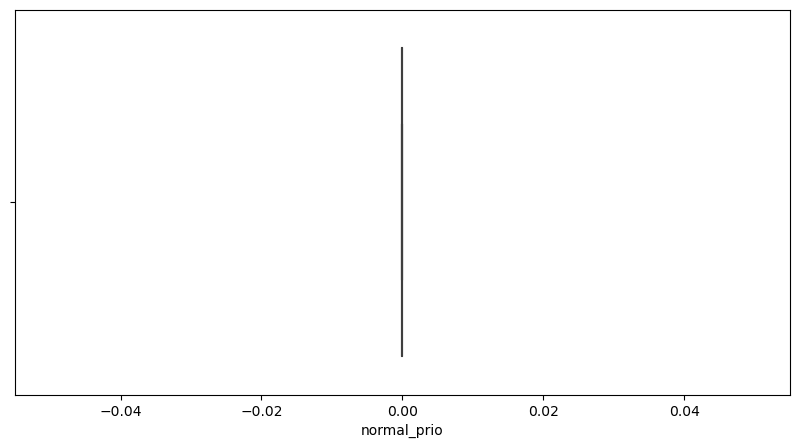

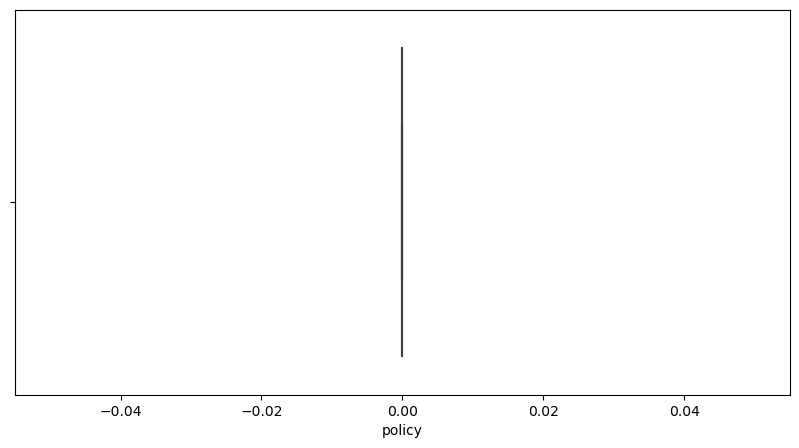

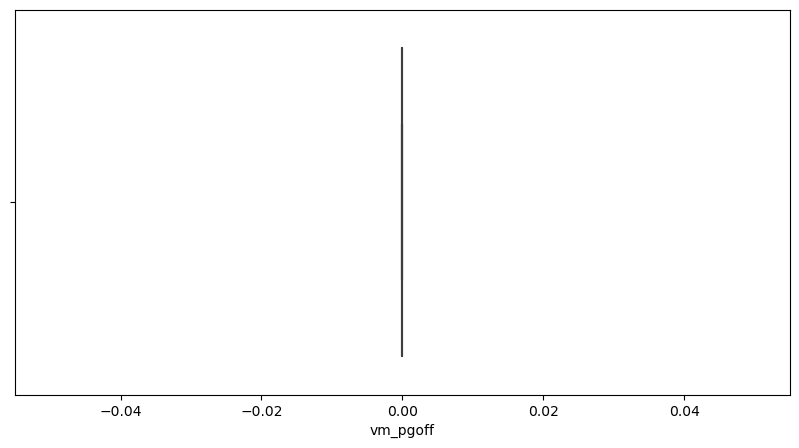

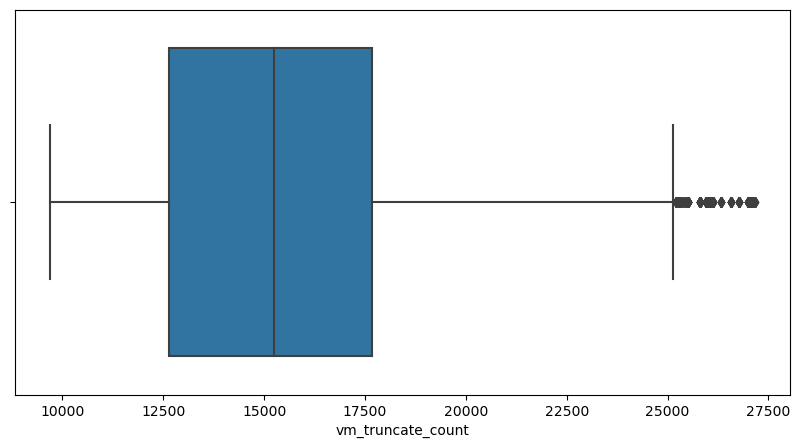

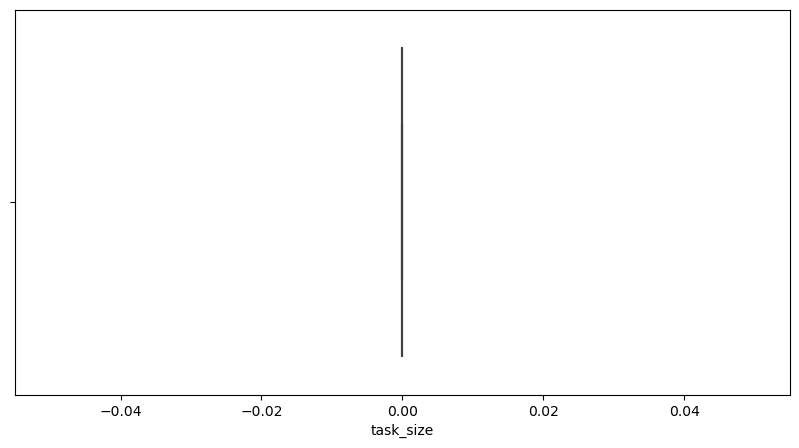

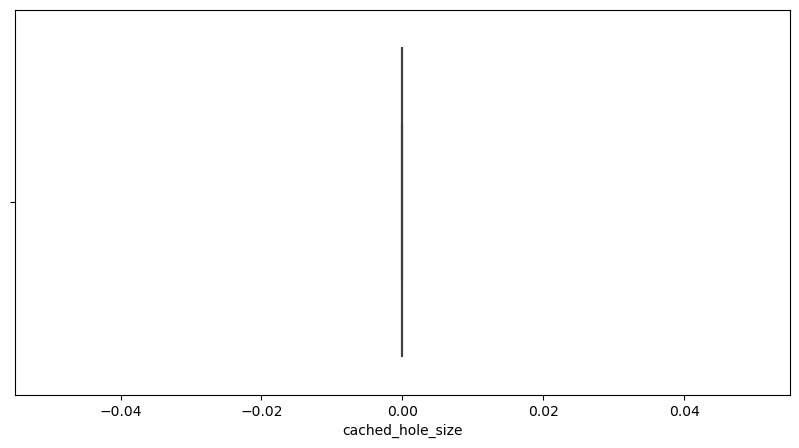

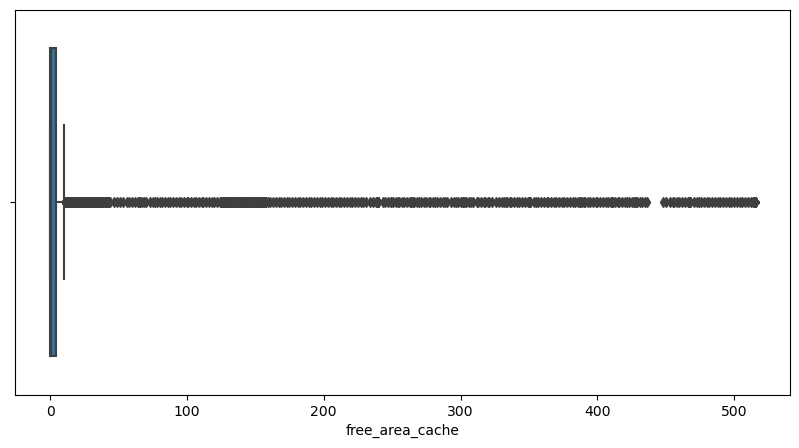

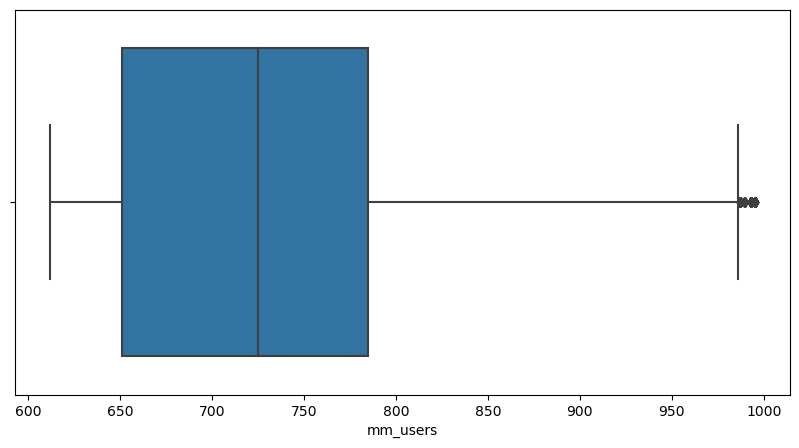

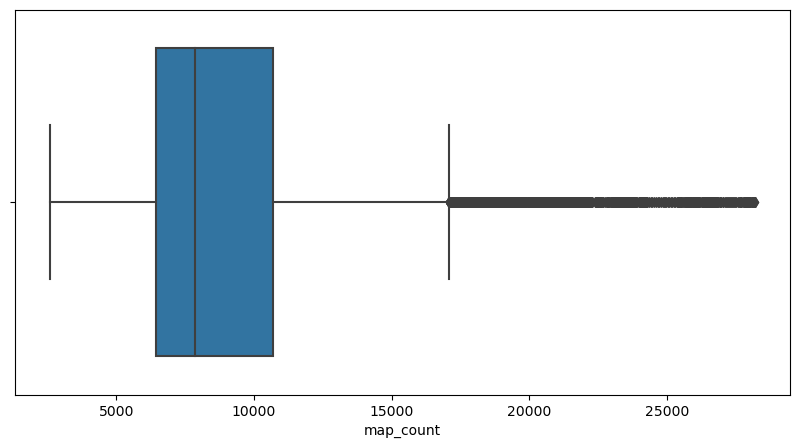

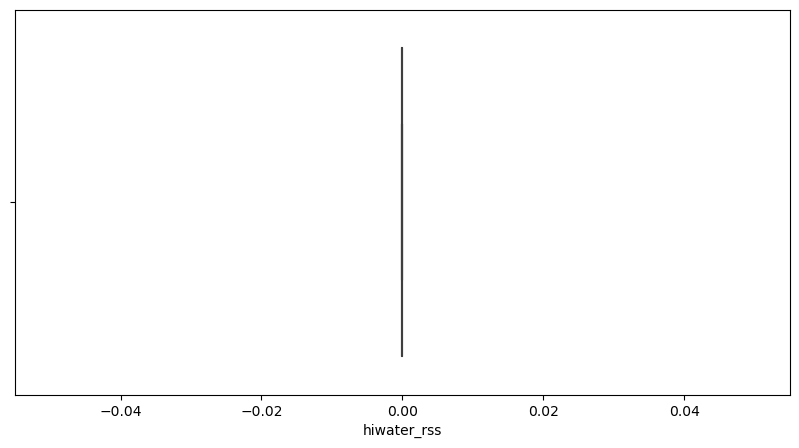

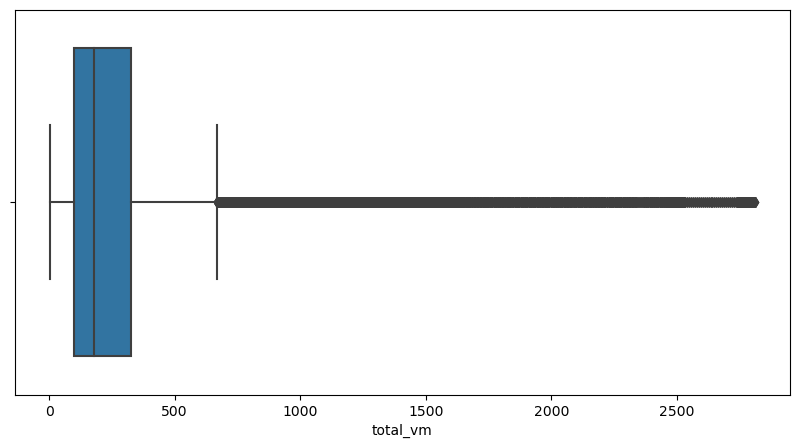

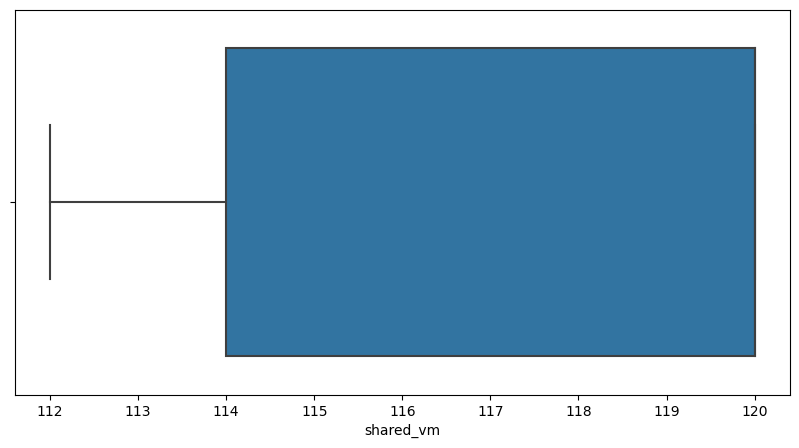

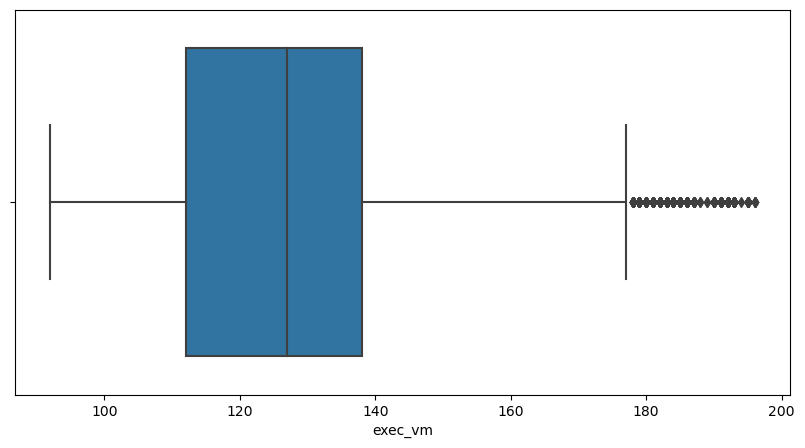

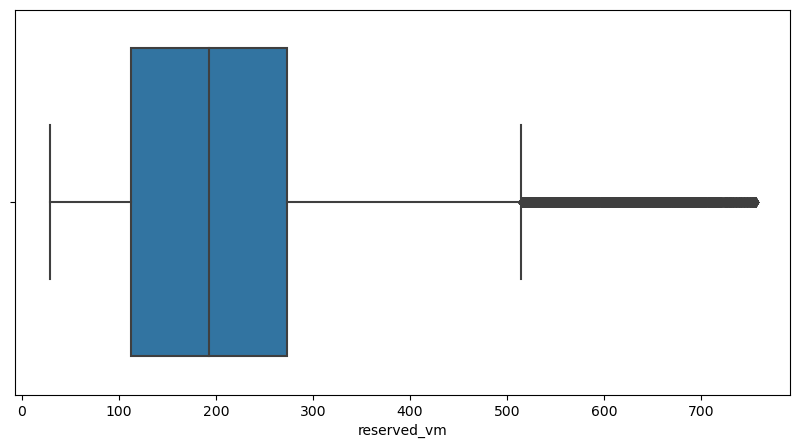

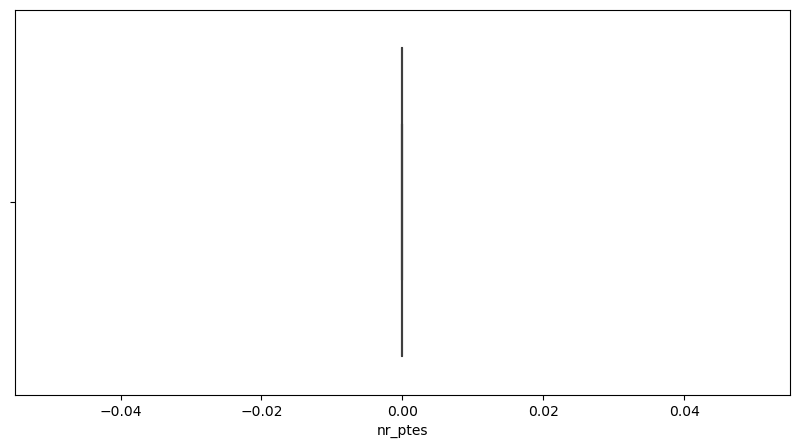

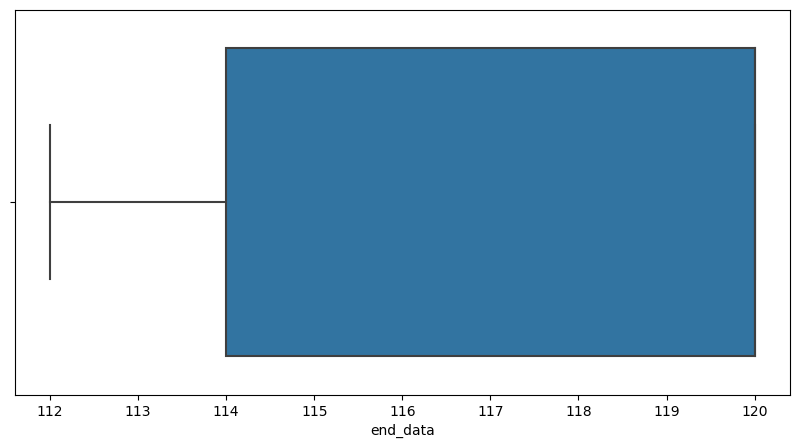

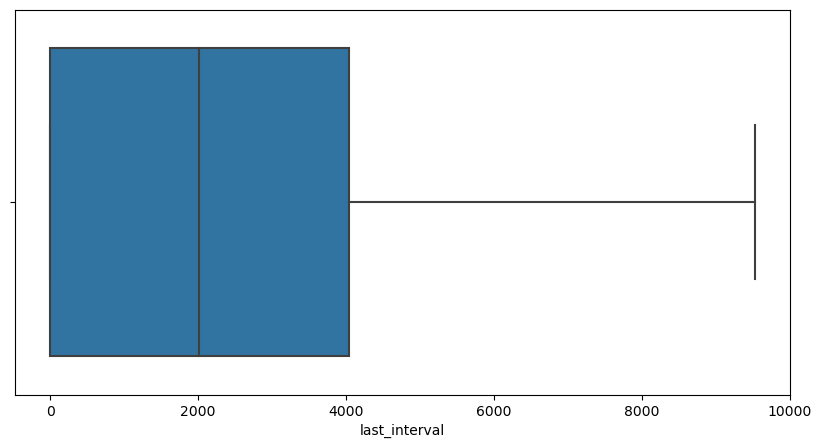

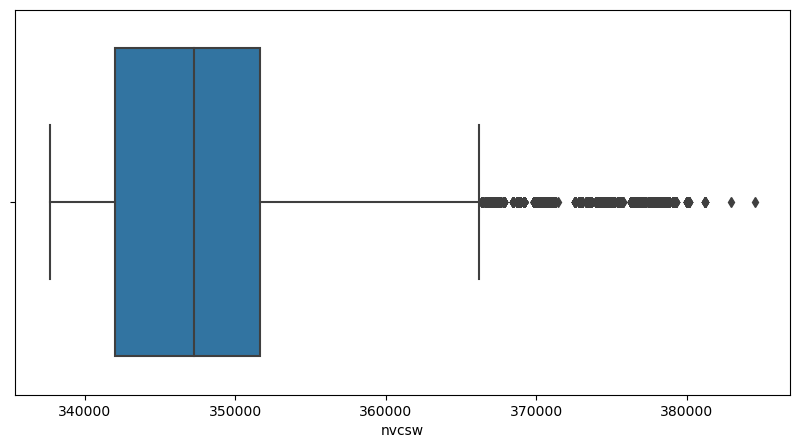

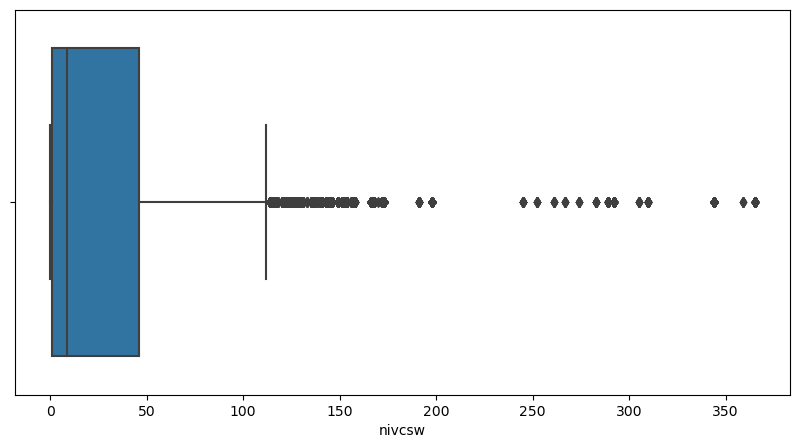

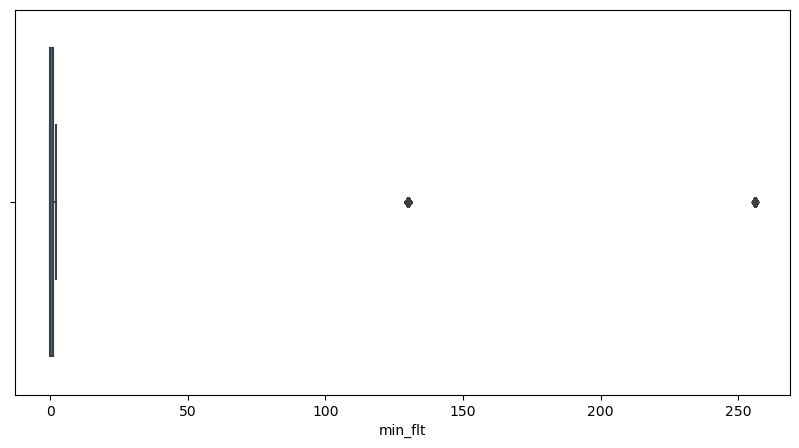

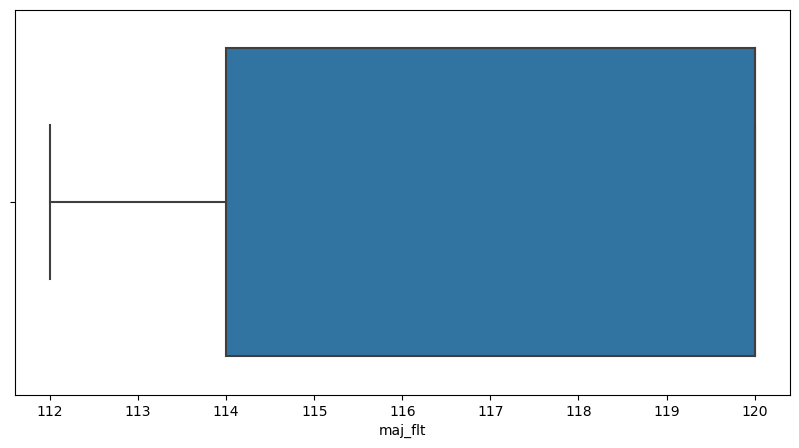

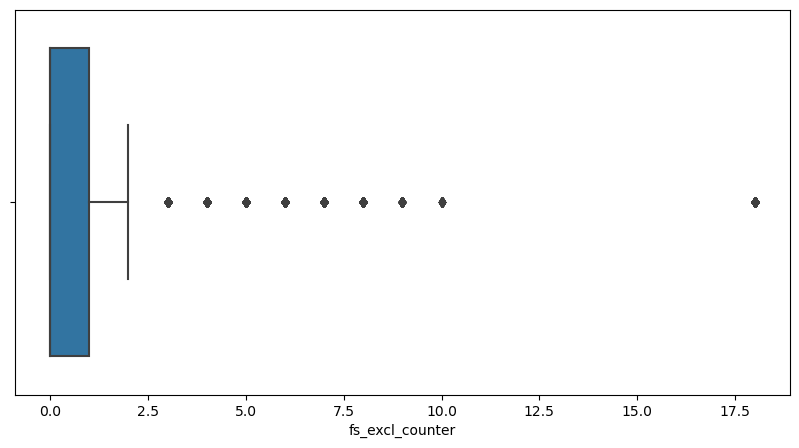

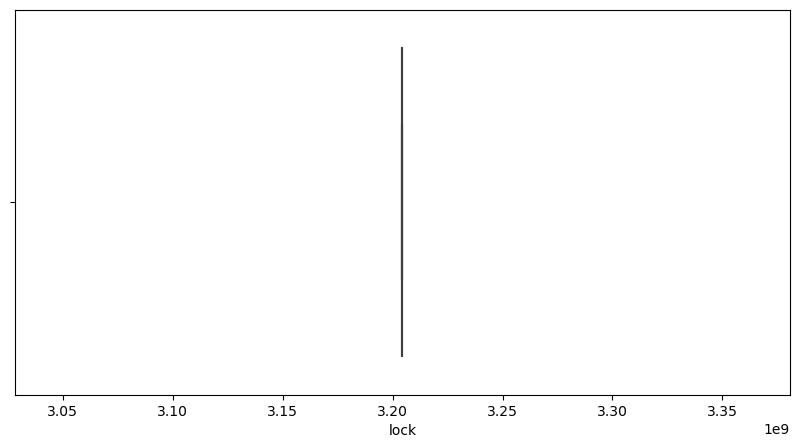

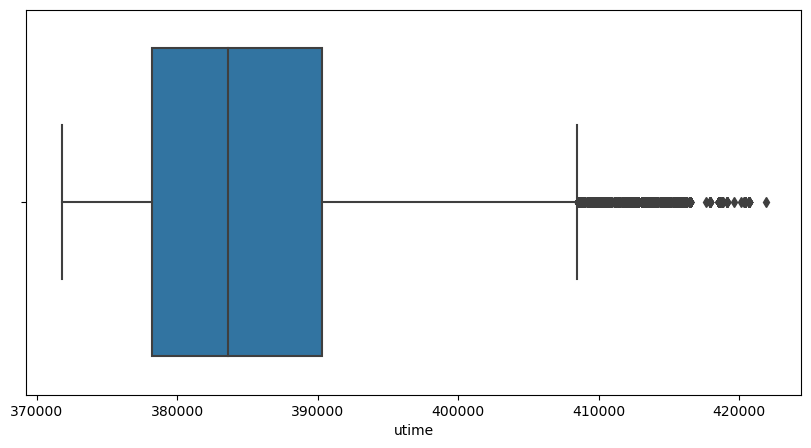

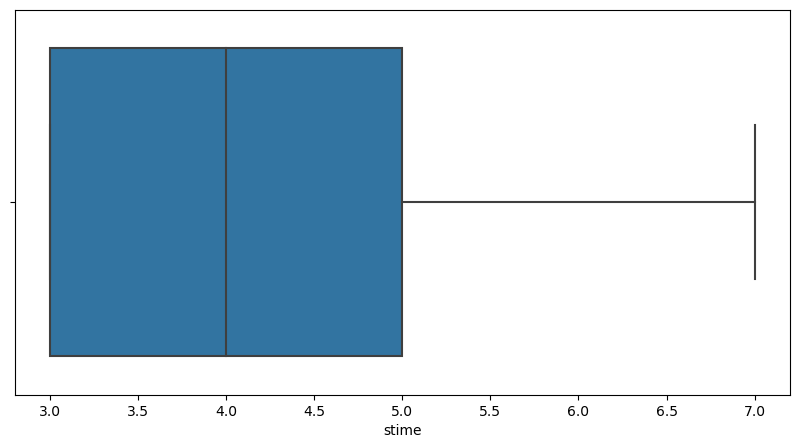

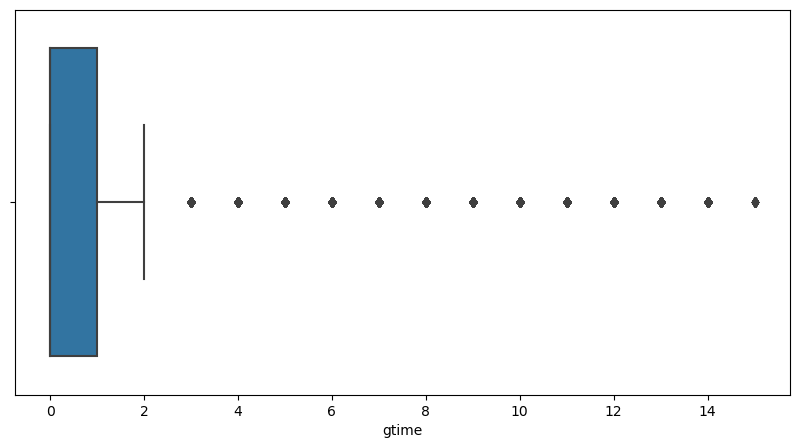

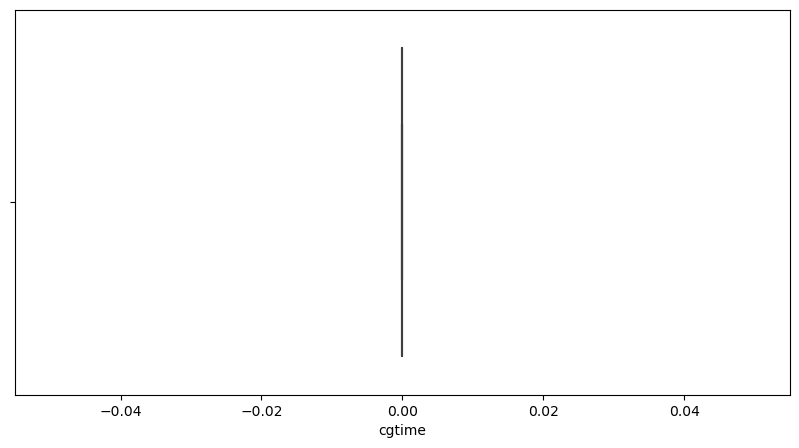

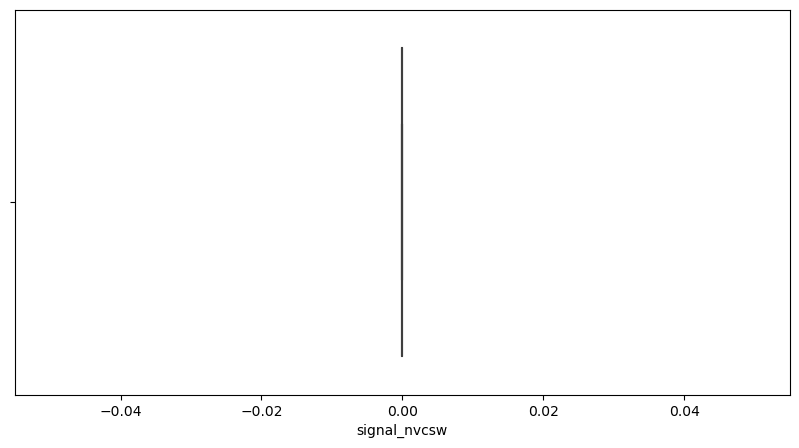

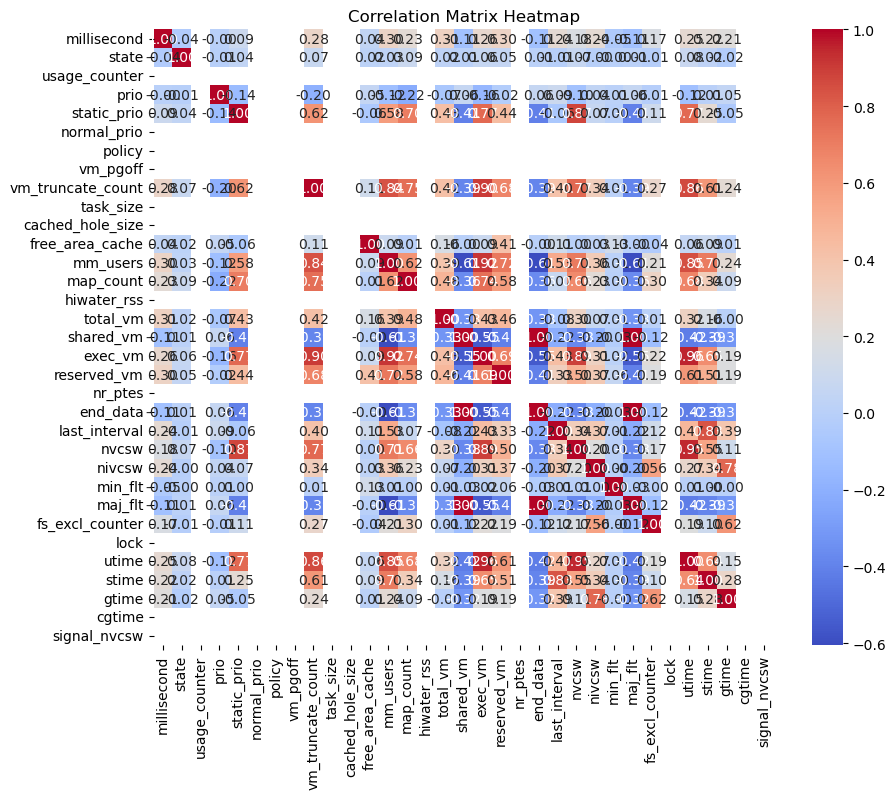

Training Random Forest...
fit took 22745.622 ms
Random Forest - Confusion Matrix:
 [[10000     0]
 [    0 10000]]
Random Forest - Classification Report:
               precision    recall  f1-score   support

      benign       1.00      1.00      1.00     10000
     malware       1.00      1.00      1.00     10000

    accuracy                           1.00     20000
   macro avg       1.00      1.00      1.00     20000
weighted avg       1.00      1.00      1.00     20000



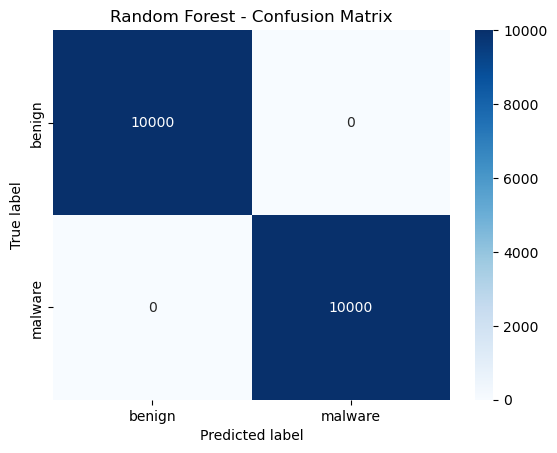

Training Logistic Regression...
fit took 2383.109 ms
Logistic Regression - Confusion Matrix:
 [[9239  761]
 [ 455 9545]]
Logistic Regression - Classification Report:
               precision    recall  f1-score   support

      benign       0.95      0.92      0.94     10000
     malware       0.93      0.95      0.94     10000

    accuracy                           0.94     20000
   macro avg       0.94      0.94      0.94     20000
weighted avg       0.94      0.94      0.94     20000



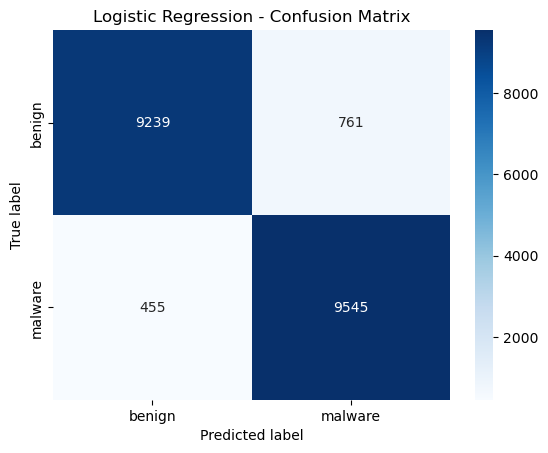

Training Support Vector Machine...
fit took 144857.823 ms
Support Vector Machine - Confusion Matrix:
 [[9981   19]
 [  19 9981]]
Support Vector Machine - Classification Report:
               precision    recall  f1-score   support

      benign       1.00      1.00      1.00     10000
     malware       1.00      1.00      1.00     10000

    accuracy                           1.00     20000
   macro avg       1.00      1.00      1.00     20000
weighted avg       1.00      1.00      1.00     20000



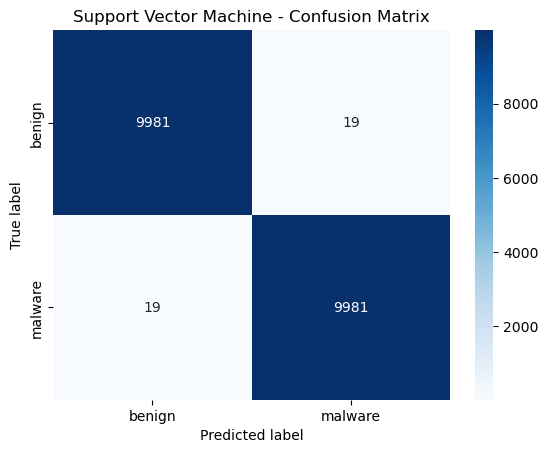

Training K-Nearest Neighbors...
fit took 727.761 ms
K-Nearest Neighbors - Confusion Matrix:
 [[9995    5]
 [   6 9994]]
K-Nearest Neighbors - Classification Report:
               precision    recall  f1-score   support

      benign       1.00      1.00      1.00     10000
     malware       1.00      1.00      1.00     10000

    accuracy                           1.00     20000
   macro avg       1.00      1.00      1.00     20000
weighted avg       1.00      1.00      1.00     20000



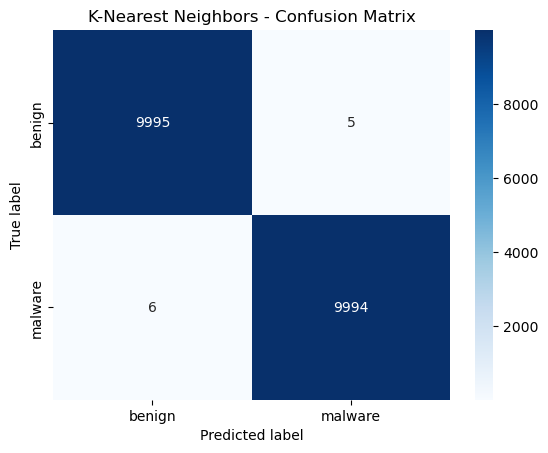

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import time
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# Function to calculate the time of a function
def timeit(fn, *args):
    t1 = time.time()
    fn(*args)
    t2 = time.time()
    print(f"{fn.__name__} took {((t2-t1)*1000.0):.3f} ms")

# Load the dataset
df = pd.read_csv('C:/Users/manoj/Documents/PythonData1200/dataset.csv')

# Confirm that 'hash' and 'classification' are the non-numeric columns
print("Non-numeric columns:", df.select_dtypes(include=['object']).columns)

# Remove the 'hash' column as it's not useful for modeling
df = df.drop(columns=['hash'])

# Assuming 'classification' is the target column
y = df['classification']
X = df.drop(columns='classification')  # Remove the target column for feature set

# Split the dataset into training and testing parts
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# EDA - Detailed Exploration
print("First few rows of the dataset:\n", df.head())
print("\nSummary statistics for numerical columns:\n", df.describe())
print("\nClass distribution:\n", y.value_counts())

# Histograms for each numerical feature
X.hist(bins=50, figsize=(20, 15))
plt.show()

# Box plots for each numerical feature
for col in X.select_dtypes(include=np.number).columns:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=X[col])
    plt.show()

# Correlation matrix heatmap - excluding the 'classification' column
numerical_df = X.select_dtypes(include=[np.number])
corr_matrix = numerical_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

# Create 4 different machine learning classifiers including KNN
classifiers = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Support Vector Machine': SVC(random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier()
}

# Train and evaluate the classifiers
for name, clf in classifiers.items():
    print(f"Training {name}...")
    timeit(clf.fit, X_train_scaled, y_train)
    y_pred = clf.predict(X_test_scaled)
    cm = confusion_matrix(y_test, y_pred)
    cr = classification_report(y_test, y_pred)
    print(f"{name} - Confusion Matrix:\n", cm)
    print(f"{name} - Classification Report:\n", cr)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=clf.classes_, yticklabels=clf.classes_)
    plt.title(f'{name} - Confusion Matrix')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
